# Предобработка данных

In [15]:
import pandas as pd
import numpy as np
import subfunc as sf
from impyute.imputation.cs import mice

In [16]:
RAW_DATA = 'data/evras.csv'
POST_PROCESSING_TRAIN_DATA = 'data/train.csv'
POST_PROCESSING_TEST_DATA = 'data/test.csv'
SOURCE_DATA = 'source/'
pd.options.display.max_columns = 90
target_columns = ['химшлак последний Al2O3',
                  'химшлак последний CaO',
                  'химшлак последний R',
                  'химшлак последний SiO2']

Информация о данных

In [17]:
data = pd.read_csv(RAW_DATA, sep=';', index_col='index', decimal=',')
data.describe(include='all')

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041,7041,7041,7041,6444.000000,6440.000000,6440.000000,6444.000000,5249.000000,6435.000000,5883.000000,6431.000000,6431.000000,6178.000000,6436.000000,6436.000000,6426.000000,1389.000000,6440.000000,6444.000000,6444.000000,6444.0,6444.0,6426.000000,1389.000000,724.000000,4770.000000,13.00,6422.000000,7.000000,6307.000000,5910.000000,6244.000000,33.000000,5.000000,383.000000,6179.000000,6400.000000,82.000000,6398.000000,1017.000000,5883.000000,6440.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6443.000000,6443.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6218.000000,6444.000000,6444.000000,6444.000000,6444.000000,6442.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000
unique,7041,7041,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,г68386397?<,2070-10-20 03:56:00,Э76ХФ,Р65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4953,6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,26.492241,46.194099,21.010523,46.063051,3.004414,0.403088,0.117692,0.139068,0.130561,0.051366,1567.771753,1587.973897,11.593261,13.227743,12989.038791,114.404252,1.009001,1.0,1.0,15.450528,10.547284,0.020862,0.132179,0.02,0.066706,0.385714,0.420162,0.054730,0.020086,0.019429,0.044000,0.023845,0.061368,0.143436,0.039869,0.215540,0.026624,0.208039,4557.236180,0.001782,0.466162,0.273289,0.101999,0.672277,0.007049,0.009971,0.07099

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            7041 non-null   object 
 1   DT                              7041 non-null   object 
 2   МАРКА                           7041 non-null   object 
 3   ПРОФИЛЬ                         7041 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

In [19]:
type(data['произв  количество плавок'].iloc[6015]) is np.nan

False

Нахождение самой популярной марки

In [20]:
top_mark = data.describe(include='all').loc["top", "МАРКА"]
print("Самая популярная марка - ", top_mark)

Самая популярная марка -  Э76ХФ


Процент пропущенных значений в датасете

In [21]:
data.isnull().sum().sort_values(ascending= False).apply(lambda x : x / data.shape[0])[:15]

ферспл FeSi-75                0.999290
сыпуч  кокс. мелочь (сух.)    0.999006
сыпуч кварцит                 0.998154
ферспл FeMo                   0.995313
ферспл  Ni H1 пласт.          0.988354
ферспл FeV азот.              0.945604
расход C пров.                0.897174
ферспл  ферванит              0.855560
расход газ  N2                0.802727
N2 (интенс.)                  0.802727
химшлак последний SiO2        0.326516
химшлак последний Al2O3       0.326516
химшлак первый SiO2_1         0.326516
химшлак первый Al2O3_1        0.326516
сыпуч известь РП              0.322539
dtype: float64

Перевод даты во время изготовления сплава

In [22]:
data['DT'] = sf.date_to_interval(data['DT'])

Оставляем колонки с > 65% известных данных

In [23]:
dropped_data = sf.drop_columns(data,0.65)

Удаленные колонки: N2 (интенс.), расход газ  N2, расход C пров., сыпуч кварцит, сыпуч  кокс. мелочь (сух.), ферспл FeMo, ферспл FeSi-75, ферспл FeV азот., ферспл  Ni H1 пласт., ферспл  ферванит


Зануляем показатели трети хим анализа

In [24]:
chemical_columns = []
for column in data.columns:
    if 'хим' in column:
        chemical_columns.append(column)

In [25]:
dropped_data[chemical_columns] = dropped_data[chemical_columns].fillna(0)

c:\program files\python37\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Удаляем объекты в которых пропущено больше 35% признаков

In [26]:
dropped_data = sf.drop_rows(dropped_data, 0.35)

 * Заполняем пропущенные данные, группируя по комбинациям признаков
  * Профиль
  * Марка

In [27]:
dropped_data

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,г6837?3<87?,52.0,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,12809.016393,115.5,1.0,1.0,1.0,18.611,NaN,0.170,0.401,0.123,0.02,0.051939,0.112,0.182,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.003,0.037,0.0,63.7,1.1,3.7,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,г683863<886,53.0,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,12816.346154,111.6,1.0,1.0,1.0,11.659,NaN,0.488,NaN,0.094,0.02,0.050854,0.102,0.251,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.003,0.038,0.0,58.5,0.8,4.9,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,г683863<887,53.0,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,12511.420613,115.8,1.0,1.0,1.0,19.871,NaN,0.050,0.346,0.061,0.02,0.052807,0.160,0.204,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.003,0.038,0.0,58.0,0.8,8.6,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,г683863<888,58.0,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664958,12998.149706,116.3,1.0,1.0,1.0,19.497,0.077,0.050,0.390,0.059,0.02,0.053349,0.161,0.345,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.003,0.038,0.0,59.8,0.4,6.4,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,г683863<889,52.0,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,12987.475538,115.0,1.0,1.0,1.0,16.649,0.082,0.050,0.412,0.035,0.02,0.051975,0.149,0.263,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,0.0003,0.421,0.105,0.796,0.006,0.013,0.081,0.008,0.017,0.568,0.003,0.037,0.0,59.6,0.7,4.7,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [28]:
str_columns = ['ПРОФИЛЬ', 'МАРКА', 'nplv', 'DT']
all_columns = dropped_data.columns.to_list()
result_columns = list(set(all_columns) - set(str_columns))

#dropped_data = sf.mean_filling(dropped_data, result_columns, ['МАРКА','ПРОФИЛЬ'])
dropped_data[result_columns] = sf.fill_empty_values(dropped_data[result_columns])

[[1.12e-01 1.00e-04 1.80e-02 ... 1.50e-01 5.80e+00 3.00e-03]
 [1.02e-01 3.00e-04 2.10e-02 ... 1.10e-01 4.10e+00 3.00e-03]
 [1.60e-01 9.00e-04 1.30e-02 ... 1.30e-01 8.10e+00 4.00e-03]
 ...
 [1.35e-01 4.00e-04 1.80e-02 ... 1.30e-01 6.70e+00 4.00e-03]
 [1.60e-01 3.00e-04 1.40e-02 ... 1.60e-01 8.90e+00 4.00e-03]
 [8.90e-02 4.00e-04 1.70e-02 ... 1.30e-01 6.60e+00 3.00e-03]]


One-hot encoding

In [29]:
dropped_data = pd.get_dummies(dropped_data, columns=['МАРКА', 'ПРОФИЛЬ'])

Предположительно свойство 'nplv' является зашифровоной индексацией и на модель не влияет

In [30]:
dropped_data = dropped_data.drop(columns=['nplv'])

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


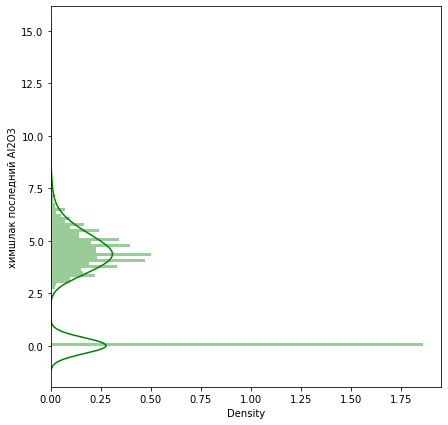

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний Al2O3'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_1.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


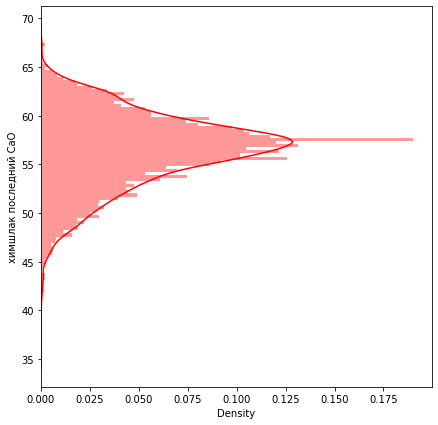

In [32]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний CaO'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_2.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


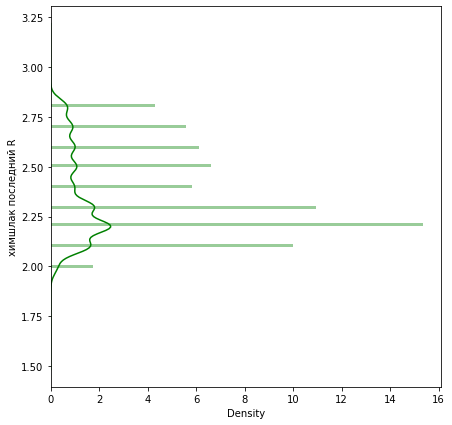

In [33]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний R'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_3.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


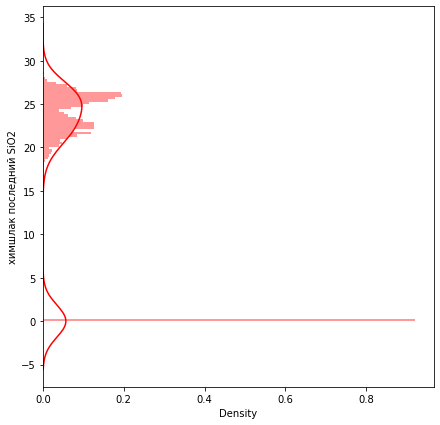

In [34]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний SiO2'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_4.png')

In [35]:
dropped_data.head()

,DT,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,...,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2,МАРКА_09Г2С,МАРКА_900А,МАРКА_G2HH,МАРКА_R260,МАРКА_R350HT,МАРКА_НХ,МАРКА_С255,МАРКА_С345,МАРКА_С355,МАРКА_Ш2.2,МАРКА_Ш2Л,МАРКА_Э73Ф,МАРКА_Э76,МАРКА_Э76Ф,МАРКА_Э76ХАФ,МАРКА_Э76ХФ,МАРКА_Э90ХАФ,ПРОФИЛЬ_136 RE,ПРОФИЛЬ_54E1,ПРОФИЛЬ_60E1,ПРОФИЛЬ_UIC54,ПРОФИЛЬ_НЕТ,ПРОФИЛЬ_ОР50,ПРОФИЛЬ_ОР65,ПРОФИЛЬ_Р50,ПРОФИЛЬ_Р65,ПРОФИЛЬ_Рельсы трамвайные,ПРОФИЛЬ_Шар заг d шара 100 мм 2 гр.,"ПРОФИЛЬ_Шар заг d шара 80-100 мм 2,3 гр.",ПРОФИЛЬ_Шар заг d шара 80-100 мм 4 гр.,ПРОФИЛЬ_Шары мелющие d 80-100 мм,ПРОФИЛЬ_Швеллер 40У,ПРОФИЛЬ_Швеллер 40У (12 категория)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52.0,29.0,45.366667,24.400000,41.033333,2.863059,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,12809.016393,115.5,1.0,1.0,1.0,18.611,0.053998,0.170,0.401000,0.123,0.02,0.051939,0.112,0.182,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,...,1.1,3.7,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,53.0,26.0,44.066667,13.866667,44.066667,2.332047,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,12816.346154,111.6,1.0,1.0,1.0,11.659,0.068327,0.488,-0.006897,0.094,0.02,0.050854,0.102,0.251,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,...,0.8,4.9,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,53.0,24.0,43.350000,17.950000,43.350000,2.776826,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,12511.420613,115.8,1.0,1.0,1.0,19.871,0.105729,0.050,0.346000,0.061,0.02,0.052807,0.160,0.204,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,...,0.8,8.6,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,58.0,17.0,46.183333,19.816667,46.183333,2.747941,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664958,12998.149706,116.3,1.0,1.0,1.0,19.497,0.077000,0.050,0.390000,0.059,0.02,0.053349,0.161,0.345,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,...,0.4,6.4,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,52.0,20.0,48.500000,17.033333,48.500000,2.690142,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,12987.475538,115.0,1.0,1.0,1.0,16.649,0.082000,0.050,0.412000,0.035,0.02,0.051975,0.149,0.263,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,...,0.7,4.7,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
normalized_data = sf.normalize_data(dropped_data)

In [37]:
categorical_columns = []
for column in normalized_data.columns:
    if 'МАРКА' in column or 'ПРОФИЛЬ' in column:
        categorical_columns.append(column)

In [38]:
corr_data = normalized_data.drop(columns=target_columns).drop(columns=categorical_columns).corr()

#plt.figure(figsize=(52, 50))

#sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
 #          cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
  #         annot=True, annot_kws={"size": 8}, square=True)
#plt.savefig(f'{SOURCE_DATA}correletion_map.png')

In [39]:
useless_list = []
for ind in corr_data.index:
    for col in corr_data.columns:
        if ind != col and abs(corr_data.loc[ind, col] >= 0.8 ):
            if [col, ind, corr_data.loc[ind, col]] not in useless_list:
                useless_list.append([ind, col, corr_data.loc[ind, col]])

useless_list

[['t обработка', 't продувка', 0.9932808319748881],
 ['t под током', 'эл. энергия', 0.959361169571915],
 ['чист расход C', 'сыпуч  кокс. мелочь КМ1', 0.8247287863227252],
 ['чист расход Cr', 'ферспл  фх850А', 0.9981192404468812],
 ['чист расход Mn', 'ферспл SiMn18', 0.9984976015326045],
 ['чист расход Si', 'ферспл  Mn5Si65Al0.5', 0.9363163693810722],
 ['чист расход V', 'ферспл  FeV-80', 0.9960851333033032],
 ['чист расход V', 'химсталь последний C', 0.826080734441642],
 ['чист расход V', 'химсталь последний V', 0.9912951399070749],
 ['ферспл  FeV-80', 'химсталь последний C', 0.8285008153653431],
 ['ферспл  FeV-80', 'химсталь последний V', 0.9850628053460967],
 ['химсталь первый Cr_1', 'химсталь последний Cr', 0.9535660772610862],
 ['химсталь первый Cu_1', 'химсталь последний Cu', 0.990669819041685],
 ['химсталь первый Mo_1', 'химсталь последний Mo', 0.8900323706891423],
 ['химсталь первый Ni_1', 'химсталь последний Ni', 0.9637081410777653],
 ['химсталь первый P_1', 'химсталь последний 

В списке "useless_list" помимо дйствительно коррелирующих признаков есть признаки, которые мы отметили, как ложно-коррелирующие
Список коррелирующих:
 * 'химсталь первый Cr_1', 'химсталь последний Cr'
 * 'химсталь первый Cu_1', 'химсталь последний Cu'
 * 'химсталь первый Mo_1', 'химсталь последний Mo'
 * 'химсталь первый Ni_1', 'химсталь последний Ni'
 * 'химсталь первый P_1', 'химсталь последний P'
 * 'химсталь первый Si_1', 'химсталь последний Si'
 * 't обработка', 't продувка'
 * 't под током', 'эл. энергия'

Из карты корреляции видно, что свойства объектов 'произв количество плавок ' и 'произв количество плавок (цел)'
не коррелирует даже сами с собой, рассмотрим их более внимательно


In [40]:
normalized_data[['произв  количество плавок','произв количество плавок (цел)']].describe()

,произв количество плавок,произв количество плавок (цел)
count,6444.0,6444.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


Из описания следует, что эти два признака имеют только по одному уникальному значению,
тк среднее кв. отклонение равно нулю, избавимся от них.

In [41]:
correlation_list = [ 'химсталь первый Cr_1',
                     'химсталь первый Cu_1',
                     'химсталь первый Mo_1',
                     'химсталь первый Ni_1',
                     'химсталь первый P_1',
                     'химсталь первый Si_1',
                     't обработка',
                     't под током',
                     'произв  количество плавок',
                     'произв количество плавок (цел)' ]

normalized_data = normalized_data.drop(columns=correlation_list)

Избавление от аномалий

In [42]:
normalized_data = sf.remove_noises(normalized_data)

In [43]:
#plot_data = normalized_data.drop(columns=categorical_columns)
#sns_plot = sns.pairplot(plot_data,
#                     x_vars=plot_data.columns,
#                     y_vars=target_columns)
#sns_plot.savefig('source/multi_map1.png')

In [47]:
mark_data_ind = normalized_data[normalized_data[f'МАРКА_{top_mark}'] == 1].index
test_data = normalized_data.iloc[mark_data_ind[: round(len(mark_data_ind) * 0.3)]]

train_data = normalized_data.drop(test_data.index, axis='index')

In [51]:
data_mark = normalized_data[normalized_data[f'МАРКА_{top_mark}'] == 1]
data_mark = data_mark.drop(columns=categorical_columns)

In [52]:
from sklearn.model_selection import train_test_split

target_set = data_mark[target_columns]
train_set = data_mark.drop(columns=target_columns)

X_train, X_test, y_train, y_test = train_test_split(train_set, target_set, test_size=0.3, random_state=42 )

In [ ]:
test_data.to_csv(POST_PROCESSING_TEST_DATA, sep='\t')
train_data.to_csv(POST_PROCESSING_TRAIN_DATA, sep='\t')

In [55]:
X_train.to_csv('data/x_train.csv', sep='\t')
X_test.to_csv('data/x_test.csv', sep='\t')

y_train.to_csv('data/y_train.csv', sep='\t')
y_test.to_csv('data/y_test.csv', sep='\t')

In [29]:
test_data.to_csv(POST_PROCESSING_TEST_DATA, sep='\t')
train_data.to_csv(POST_PROCESSING_TRAIN_DATA, sep='\t')